# 2.1.5 Aprendizaje Minibatch

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

## 2.1.5.1 Definición del problema de estimación de parámetros y función de pérdida

Se desean encontra los parámetros w0 y w1 del siguiente modelo de regresión entre las variables x y y:

$$ y_{i} = w_{i}x_{i} + w_{0} + e_{i} $$

a partir de un conjunto de observaciones ${d_{i}, x_{i}}$, donde $d_{i}$ es el valor real (observado), $y_{i}$ es su aproximación usando el modelo de regresión descrito, y $e_{i}$ es el error aleatorio.

- Error instantáneo:

$$ e_{i} = d_{i} - y_{i} $$

- Sumatoria del error cuadrático instantáneo:

$$ SSE(w_0, w_1) = \sum_{i}^{} (d_i - y_i)^2 $$

In [ ]:
#
# Dataset
#
x_sample = [
    0.1087,0.2698,0.3765,0.2146,0.9155,0.0246,
    0.0221,0.8632,0.6460,0.2092,0.8567,0.1591,
    0.9647,0.6231,0.7460,0.3654,0.3065,0.6886,
    0.4966,0.2008,0.2618,0.7607,0.1563,0.4424,
    0.7731,
]

y_sample = [
    0.9519,1.1237,1.2360,1.0526,2.0743,0.7906,
    0.7603,2.0533,1.6887,1.0563,2.0991,0.8953,
    2.1917,1.6266,1.8508,1.2828,1.2283,1.8722,
    1.4657,1.0418,1.1097,1.7826,0.9711,1.4267,
    1.8248,
]

## 2.1.5.2 Función de pérdida

In [ ]:
#
# Sumatoria del error cuadrático o pérdida cuadrática
#
def sse(w0, w1):
    y_forecasts = [w0 + w1 * x_value for x_value in x_sample]
    errors = [y_true - y_forecast for y_true, y_forecast in zip(y_sample, y_forecasts)]
    squared_errors = [error ** 2 for error in errors]
    return sum(squared_errors)

## 2.1.5.2 Método del gradiente

- Aprendizaje Online:

    $$ w_{k} = w_{k-1} - \mu (\frac{\delta}{\delta_w} e_î^2) $$
    
- Aprendizaje Batch:

    $$ w_k = w_{k-1} - \mu \frac{\delta}{\delta_w} SEE(\delta_{w-1}) $$  
    
    (revisar formula)

    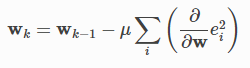

## 2.1.5.3 Derivadas

In [ ]:
#
# Esta es el mismo computo que el empleado en el
# método batch.
#
def gradient(w0, w1, indices):

    x_batch = x_sample[indices]
    y_batch = y_sample[indices]

    y_forecasts = [w0 + w1 * x_value for x_value in x_batch]

    errors = [y_true - y_forecast for y_true, y_forecast in zip(y_batch, y_forecasts)]

    gradient_w0 = -2 * sum(errors)
    gradient_w1 = -2 * sum([error * x_value for error, x_value in zip(errors, x_batch)])

    return gradient_w0, gradient_w1

## 2.1.5.4 Minibatch

Para conjuntos de datos muy grandes el aprendizaje batch es muy costoso computacionalmente.

- El conjunto de datos se divide en varios subconjuntos.
- Se ordenan aleatoriamente los subconjuntos de datos y luego se recorren uno a uno, tal como en el caso del gradiente descendente estocástico.
- Para el subconjunto actual, se computa el gradiente neto (tal como en el caso del aprendizaje batch) y se corrigen los parámetros.
- Se repite nuevamente el proceso hasta que el algoritmo converga.

## 2.1.5.5 Ecuación de mejora

In [ ]:
def improve(w0, w1, mu, indices):

    gradient_w0, gradient_w1 = gradient(w0, w1, indices)

    w0 = w0 - mu * gradient_w0
    w1 = w1 - mu * gradient_w1

    return w0, w1

## 2.1.5.6 Proceso iterativo 

### Particionamiento de los grupos

In [ ]:
#
# Función auxililar para graficar el contorno
#
def plot_contour():

    W0 = np.linspace(0.0, 2.0, 50)
    W1 = np.linspace(1.5, 3.2, 50)
    W0, W1 = np.meshgrid(W0, W1)
    F = sse(W0, W1)

    levels = [0, 0.2, 0.5, 0.75, 1, 2, 3, 5, 10, 20, 40, 60, 80, 100, 120]

    fig, ax = plt.subplots(figsize=(8, 8))

    ax.set_aspect("equal", "box")
    ax.contourf(W0, W1, F, cmap=cm.Greys, levels=levels, alpha=0.8)
    ax.contour(W0, W1, F, colors="gray", levels=levels)
    ax.grid()
    ax.set_xlabel("w0")
    ax.set_ylabel("w1")

In [ ]:
n_batches = 5
batch_indices = np.array_split(np.array(range(len(x_sample))), n_batches)
batch_indices

In [ ]:
#
# Punto de inicio
#
w0 = 0.5
w1 = 3.0

history = {
    "w0": [w0],
    "w1": [w1],
    "sse": [sse(w0, w1)],
}

mu = 0.05

x_sample = np.array(x_sample)
y_sample = np.array(y_sample)

for epoch in range(10):

    for i_group in np.random.choice(n_batches, n_batches, replace=False):

        indices = list(batch_indices[i_group])

        w0, w1 = improve(w0, w1, mu, indices)

        history["w0"].append(w0)
        history["w1"].append(w1)
        history["sse"].append(sse(w0, w1))

print(" w0 = {:6.4f}\n w1 = {:6.4f}\nSSE = {:6.4f}\n".format(w0, w1, sse(w0, w1)))

plot_contour()
plt.plot(history["w0"], history["w1"], marker=".", color="black")
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history["sse"], ".-k")
plt.xlabel("Iteraciones")
plt.ylabel("SSE(w0, w1)")
plt.show()

In [ ]:
n_batches = 5
batch_indices = np.array_split(np.array(range(len(x_sample))), n_batches)
batch_indices

In [ ]:
def epocas(w0, w1, epocas, learning_rate, x_sample, y_sample):
    
    history = {"w0": [w0], "w1": [w1], "sse": [sse(w0, w1)]}
    
    x_sample = np.array(x_sample)
    y_sample = np.array(y_sample)
    
    for epoch in range(epocas):
        
        for i_group in np.random.choice(n_batches, n_batches, replace=False):  ###
            
            indices = list(batch_indices[i_group])
            w0, w1 = improve(w0, w1, learning_rate, indices)
            history["w0"].append(w0)
            history["w1"].append(w1)
            history["sse"].append(sse(w0, w1))
    
    #
    # Ultimo resultado obtenido
    #
    print(" w0 = {:6.4f}\n w1 = {:6.4f}\nSSE = {:6.4f}\n".format(w0, w1, sse(w0, w1)))
    
    return history

In [ ]:
history = epocas(0.5, 3.0, 10, 0.05, x_sample, y_sample)

In [ ]:
plot_contour()
plt.plot(history["w0"], history["w1"], marker=".", color="black")
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history["sse"], ".-k")
plt.xlabel("Iteraciones")
plt.ylabel("SSE(w0, w1)")
plt.show()

In [ ]:
print('ok_')